## Лабораторная работа №2. Понижение размерности пространства признаков.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA 

### Загрузка датасета

In [2]:
df = pd.read_csv('datasets/glass.csv')

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Разделение данных на описательные признаки и признак отображающий класс

In [13]:
var_names = list(df.columns)

labels = df.to_numpy('int')[:, -1]
data = df.to_numpy('float')[:, :-1]
labels, data

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
        [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
        [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
        ...,
        [ 1.52065, 14.36   ,  0.     ,

Нормировка данных к интервалу [0 1]

In [16]:
data = preprocessing.minmax_scale(data)
data

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

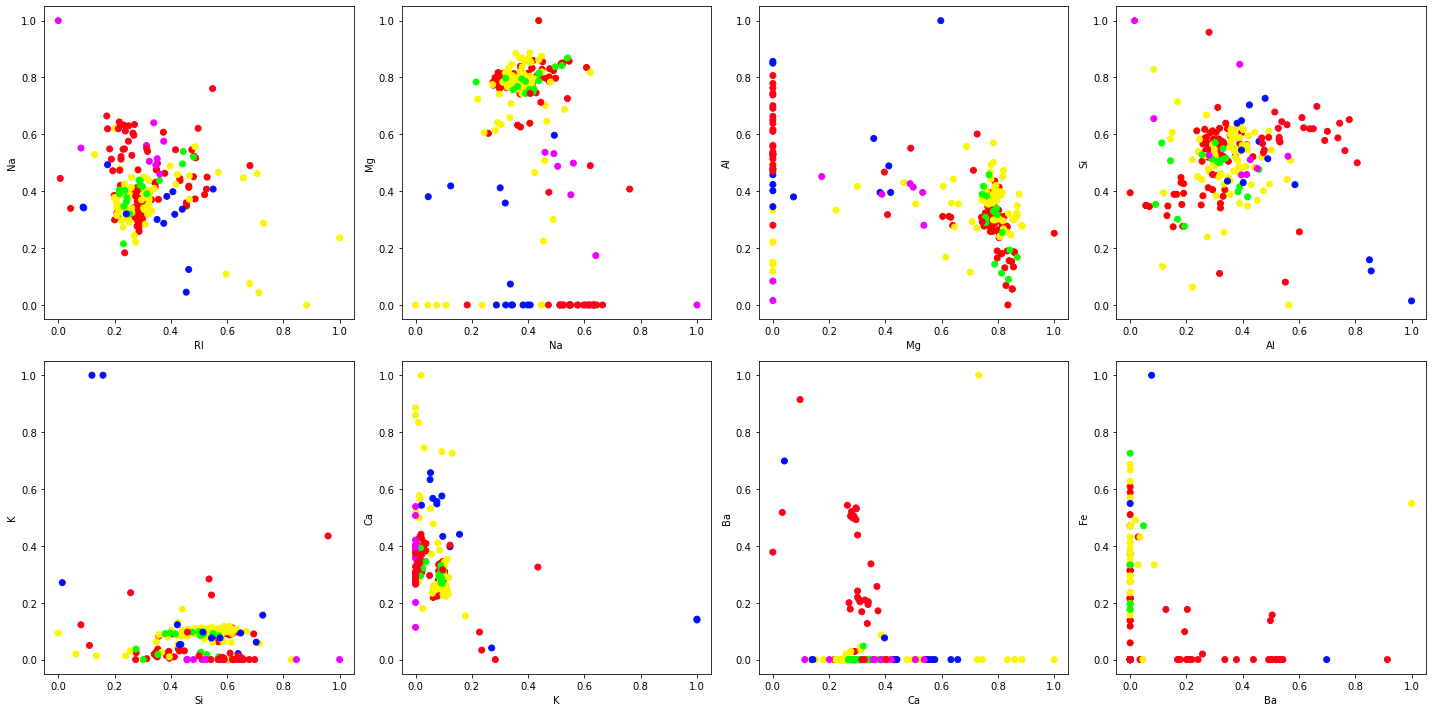

In [26]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(data.shape[1] - 1):    
    axs[i // 4, i % 4].scatter(data[:, i], data[:, (i + 1)], c=labels, cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i + 1])
    print()
    
fig.tight_layout()
plt.show()

### Метод главных компонент

Понижение размерности пространства до размерности 2 с помощью метода главных компонент

In [22]:
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)
pca_data

array([[-4.02106406e-01,  3.27066975e-02],
       [-2.06319788e-01, -1.44705307e-01],
       [-1.88617003e-01, -1.94853604e-01],
       [-2.37208477e-01, -9.70644677e-02],
       [-2.23972190e-01, -1.21779151e-01],
       [-2.38343376e-01,  6.01961887e-02],
       [-2.25779812e-01, -1.07449689e-01],
       [-2.34800324e-01, -9.28817916e-02],
       [-1.96420004e-01, -6.89746231e-02],
       [-2.26074680e-01, -3.65788388e-03],
       [-2.09164891e-01,  4.00937901e-02],
       [-2.31471612e-01, -8.27551882e-02],
       [-2.12382788e-01,  5.20902469e-02],
       [-2.33643459e-01,  5.60754213e-02],
       [-2.15589511e-01, -9.27878222e-02],
       [-2.10275625e-01, -9.24555840e-02],
       [-2.40970549e-01, -6.03327681e-02],
       [-2.74049249e-01,  1.05050258e-01],
       [-2.35649810e-01, -1.33111972e-02],
       [-1.84782225e-01, -6.71381503e-02],
       [-2.20192190e-01,  7.68746710e-02],
       [-2.92920109e-01,  7.85024823e-02],
       [-2.22716712e-01, -7.41155597e-02],
       [-2.

Значение объясненной дисперсии и собственные числа, соответствующие компонентам

In [23]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


Диаграмма рассеяния после метода главных компонент

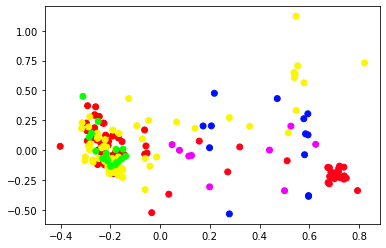

In [24]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='hsv')
plt.show()